In [1]:
library(ggplot2)
library(cowplot)

In [2]:
## NOTE: The data used in this demo comes from the UCI machine learning
## Specifically, this is the heart disease data set.
## http://archive.ics.uci.edu/ml/datasets/Heart+Disease

url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
data <- read.csv(url, header=FALSE)

In [4]:
## Reformat the data so that it is
## 1) Easy to use (add nice column names)
## 2) Interpreted correctly by glm()..

head(data) # you see data, but no column names

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
colnames(data) <- c(
  "age",
  "sex",# 0 = female, 1 = male
  "cp", # chest pain
  # 1 = typical angina,
  # 2 = atypical angina,
  # 3 = non-anginal pain,
  # 4 = asymptomatic
  "trestbps", # resting blood pressure (in mm Hg)
  "chol", # serum cholestoral in mg/dl
  "fbs",  # fasting blood sugar if less than 120 mg/dl, 1 = TRUE, 0 = FALSE
  "restecg", # resting electrocardiographic results
  # 1 = normal
  # 2 = having ST-T wave abnormality
  # 3 = showing probable or definite left ventricular hypertrophy
  "thalach", # maximum heart rate achieved
  "exang",   # exercise induced angina, 1 = yes, 0 = no
  "oldpeak", # ST depression induced by exercise relative to rest
  "slope", # the slope of the peak exercise ST segment
  # 1 = upsloping
  # 2 = flat
  # 3 = downsloping
  "ca", # number of major vessels (0-3) colored by fluoroscopy
  "thal", # this is short of thalium heart scan
  # 3 = normal (no cold spots)
  # 6 = fixed defect (cold spots during rest and exercise)
  # 7 = reversible defect (when cold spots only appear during exercise)
  "hd" # (the predicted attribute) - diagnosis of heart disease
  # 0 if less than or equal to 50% diameter narrowing
  # 1 if greater than 50% diameter narrowing
)

In [6]:
head(data) # now we have data and column names

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [7]:
str(data) # this shows that we need to tell R which columns contain factors
# it also shows us that there are some missing values. There are "?"s
# in the dataset. These are in the "ca" and "thal" columns...

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : chr  "0.0" "3.0" "2.0" "0.0" ...
 $ thal    : chr  "6.0" "3.0" "7.0" "3.0" ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


In [8]:
## First, convert "?"s to NAs...

data[data == "?"] <- NA

In [9]:
## Now add factors for variables that are factors and clean up the factors
## that had missing data...

data[data$sex == 0,]$sex <- "F"
data[data$sex == 1,]$sex <- "M"
data$sex <- as.factor(data$sex)

In [10]:
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)

In [13]:
data$ca <- as.integer(data$ca) # since this column had "?"s in it
# R thinks that the levels for the factor are strings, but
# we know they are integers, so first convert the strings to integers...
data$ca <- as.factor(data$ca)  # ...then convert the integers to factor levels

In [14]:
data$thal <- as.integer(data$thal) # "thal" also had "?"s in it.
data$thal <- as.factor(data$thal)

In [15]:
## This next line replaces 0 and 1 with "Healthy" and "Unhealthy"

data$hd <- ifelse(test=data$hd == 0, yes="Healthy", no="Unhealthy")
data$hd <- as.factor(data$hd) # Now convert to a factor

In [16]:
 str(data) ## this shows that the correct columns are factors

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "1","2","3","4": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3","6","7": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


In [17]:
## Now determine how many rows have "NA" (aka "Missing data"). If it's just
## a few, we can remove them from the dataset, otherwise we should consider
## imputing the values with a Random Forest or some other imputation method.

nrow(data[is.na(data$ca) | is.na(data$thal),])

[1] 6

In [18]:
data[is.na(data$ca) | is.na(data$thal),]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
88,53,F,3,128,216,0,2,115,0,0.0,1,1,NA,Healthy
167,52,M,3,138,223,0,0,169,0,0.0,1,NA,3,Healthy
193,43,M,4,132,247,1,2,143,1,0.1,2,NA,7,Unhealthy
267,52,M,4,128,204,1,0,156,1,1.0,2,1,NA,Unhealthy
288,58,M,2,125,220,0,0,144,0,0.4,2,NA,7,Healthy
303,38,M,3,138,175,0,0,173,0,0.0,1,NA,3,Healthy


In [19]:
## so 6 of the 303 rows of data have missing values. This isn't a large
## percentage (2%), so we can just remove them from the dataset
## NOTE: This is different from when we did machine learning with
## Random Forests. When we did that, we imputed values.

nrow(data)

[1] 303

In [20]:
data <- data[!(is.na(data$ca) | is.na(data$thal)),]

In [21]:
nrow(data)

[1] 297

In [22]:
## Now we can do some quality control by making sure all of the factor
## levels are represented by people with and without heart disease (hd)

## NOTE: We also want to exclude variables that only have 1 or 2 samples in
## a category since +/- one or two samples can have a large effect on the
## odds/log(odds)

xtabs(~ hd + sex, data=data)

           sex
hd            F   M
  Healthy    71  89
  Unhealthy  25 112

In [23]:
xtabs(~ hd + cp, data=data)

           cp
hd            1   2   3   4
  Healthy    16  40  65  39
  Unhealthy   7   9  18 103

In [24]:
xtabs(~ hd + fbs, data=data)

           fbs
hd            0   1
  Healthy   137  23
  Unhealthy 117  20

In [25]:
xtabs(~ hd + restecg, data=data)

           restecg
hd           0  1  2
  Healthy   92  1 67
  Unhealthy 55  3 79

In [26]:
xtabs(~ hd + exang, data=data)

           exang
hd            0   1
  Healthy   137  23
  Unhealthy  63  74

In [27]:
xtabs(~ hd + slope, data=data)

           slope
hd            1   2   3
  Healthy   103  48   9
  Unhealthy  36  89  12

In [28]:
xtabs(~ hd + ca, data=data)

           ca
hd            1   2   3   4
  Healthy   129  21   7   3
  Unhealthy  45  44  31  17

In [29]:
xtabs(~ hd + thal, data=data)

           thal
hd            3   6   7
  Healthy   127   6  27
  Unhealthy  37  12  88

In [30]:
## Now we are ready for some logistic regression. First we'll create a very
## simple model that uses sex to predict heart disease

 
## let's start super simple and see if sex (female/male) is a good predictor...
## First, let's just look at the raw data...

xtabs(~ hd + sex, data=data)

           sex
hd            F   M
  Healthy    71  89
  Unhealthy  25 112

In [ ]:
## Most of the females are healthy and most of the males are unhealthy.
## Being female is likely to decrease the odds in being unhealthy.
##    In other words, if a sample is female, the odds are against it that it
##    will be unhealthy
## Being male is likely to increase the odds in being unhealthy...
##    In other words, if a sample is male, the odds are for it being unhealthy

In [31]:
## Now do the actual logistic regression

logistic <- glm(hd ~ sex, data=data, family="binomial")
summary(logistic)


Call:
glm(formula = hd ~ sex, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2765  -1.2765  -0.7768   1.0815   1.6404  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0438     0.2326  -4.488 7.18e-06 ***
sexM          1.2737     0.2725   4.674 2.95e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 409.95  on 296  degrees of freedom
Residual deviance: 386.12  on 295  degrees of freedom
AIC: 390.12

Number of Fisher Scoring iterations: 4


In [32]:
## Let's start by going through the first coefficient...
## (Intercept)  -1.0438     0.2326  -4.488 7.18e-06 ***

## The intercept is the log(odds) a female will be unhealthy. This is because
## female is the first factor in "sex" (the factors are ordered,
## alphabetically by default,"female", "male")

female.log.odds <- log(25 / 71)
female.log.odds

[1] -1.043804

In [33]:
## Now let's look at the second coefficient...
##   sexM        1.2737     0.2725   4.674 2.95e-06 ***

## sexM is the log(odds ratio) that tells us that if a sample has sex=M, the
## odds of being unhealthy are, on a log scale, 1.27 times greater than if
## a sample has sex=F.

male.log.odds.ratio <- log((112 / 89) / (25/71))
male.log.odds.ratio

[1] 1.273667

In [34]:
 ## Now calculate the overall "Pseudo R-squared" and its p-value
 
## NOTE: Since we are doing logistic regression...
## Null deviance = 2*(0 - LogLikelihood(null model))
##               = -2*LogLikihood(null model)
## Residual deviance = 2*(0 - LogLikelihood(proposed model))
##                   = -2*LogLikelihood(proposed model)

ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2

In [35]:
## McFadden's Pseudo R^2 = [ LL(Null) - LL(Proposed) ] / LL(Null)

(ll.null - ll.proposed) / ll.null

[1] 0.05812569

In [36]:
## chi-square value = 2*(LL(Proposed) - LL(Null))
## p-value = 1 - pchisq(chi-square value, df = 2-1)

1 - pchisq(2*(ll.proposed - ll.null), df=1)
1 - pchisq((logistic$null.deviance - logistic$deviance), df=1)

[1] 1.053157e-06

[1] 1.053157e-06

In [37]:
## Lastly, let's  see what this logistic regression predicts, given
## that a patient is either female or male (and no other data about them).

predicted.data <- data.frame(
  probability.of.hd=logistic$fitted.values,
  sex=data$sex)

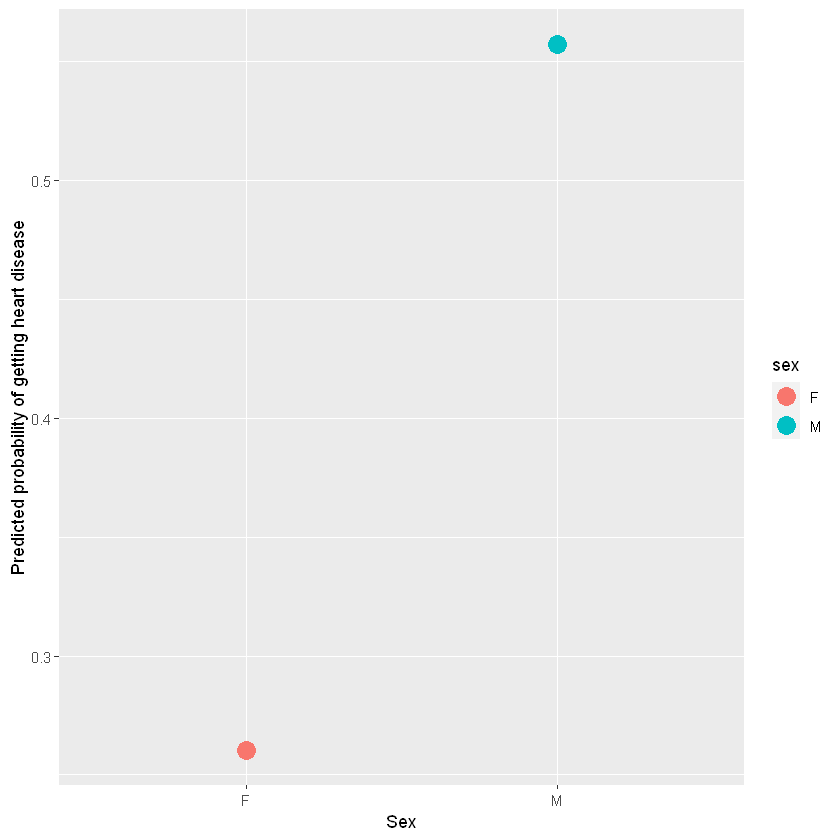

In [38]:
## We can plot the data...

ggplot(data=predicted.data, aes(x=sex, y=probability.of.hd)) +
  geom_point(aes(color=sex), size=5) +
  xlab("Sex") +
  ylab("Predicted probability of getting heart disease")

In [39]:
## Since there are only two probabilities (one for females and one for males),
## we can use a table to summarize the predicted probabilities.

xtabs(~ probability.of.hd + sex, data=predicted.data)

                   sex
probability.of.hd     F   M
  0.260416666667241  96   0
  0.55721393034826    0 201

In [40]:
## Now we will use all of the data available to predict heart disease

logistic <- glm(hd ~ ., data=data, family="binomial")
summary(logistic)


Call:
glm(formula = hd ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0490  -0.4847  -0.1213   0.3039   2.9086  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.253978   2.960399  -2.113 0.034640 *  
age         -0.023508   0.025122  -0.936 0.349402    
sexM         1.670152   0.552486   3.023 0.002503 ** 
cp2          1.448396   0.809136   1.790 0.073446 .  
cp3          0.393353   0.700338   0.562 0.574347    
cp4          2.373287   0.709094   3.347 0.000817 ***
trestbps     0.027720   0.011748   2.359 0.018300 *  
chol         0.004445   0.004091   1.087 0.277253    
fbs1        -0.574079   0.592539  -0.969 0.332622    
restecg1     1.000887   2.638393   0.379 0.704424    
restecg2     0.486408   0.396327   1.227 0.219713    
thalach     -0.019695   0.011717  -1.681 0.092781 .  
exang1       0.653306   0.447445   1.460 0.144267    
oldpeak      0.390679   0.239173   1.633 0.102373   

In [41]:
## Now calculate the overall "Pseudo R-squared" and its p-value

ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2

In [42]:
## McFadden's Pseudo R^2 = [ LL(Null) - LL(Proposed) ] / LL(Null)

(ll.null - ll.proposed) / ll.null

[1] 0.5533531

In [43]:
## The p-value for the R^2

1 - pchisq(2*(ll.proposed - ll.null), df=(length(logistic$coefficients)-1))

[1] 0

In [44]:
## now we can plot the data
## keeping the predicted value of hd and actual status of having hd

predicted.data <- data.frame(probability.of.hd=logistic$fitted.values, hd=data$hd)

In [45]:
## order the predicted value in ascending order

predicted.data <- predicted.data[order(predicted.data$probability.of.hd, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)

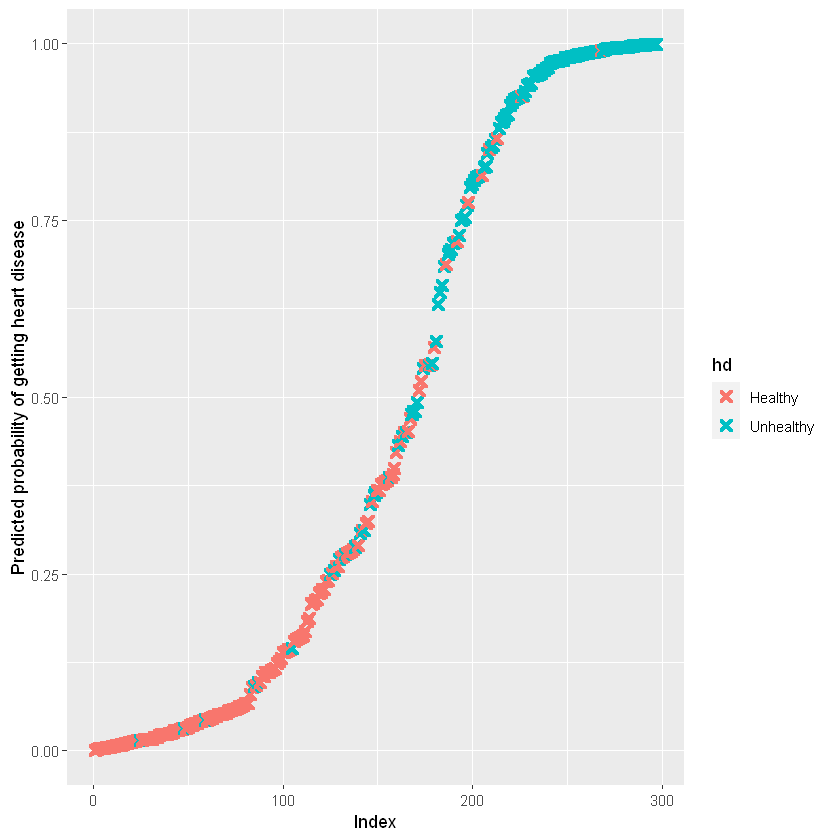

In [46]:
## Lastly, we can plot the predicted probabilities for each sample having
## heart disease and color by whether or not they actually had heart disease

ggplot(data=predicted.data, aes(x=rank, y=probability.of.hd)) +
  geom_point(aes(color=hd), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of getting heart disease")